<a href="https://colab.research.google.com/github/Swayamprakashpatel/Release_Simulation/blob/main/Microsphere_Release_Simulation_Updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

It is possible to create a simulation model for predicting the drug release profile of mixtures of your microparticles. The basic idea is to use the weighted average of the drug release profiles of each individual type of microparticle based on their proportions in the mixture.

Here are the steps to achieve this:

Data Preparation: Ensure you have the drug release data for each type of microparticle in a structured format (e.g., as CSV files).

Interpolation (if needed): If the time points are not the same for all types of microparticles, you may need to interpolate the data so that they align.

Weighted Averaging: Calculate the cumulative drug release for the mixture at each time point by taking a weighted average of the drug release profiles based on the proportions of each type of microparticle in the mixture.

Visualization: Plot the resulting drug release profile.

Below is the Python code to perform this simulation in Google Colab:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Step 1: Load data
# Replace 'file_path' with the actual paths to your CSV files
data_1_0 = pd.read_csv('path_to_file_1_0.csv')
data_1_1 = pd.read_csv('path_to_file_1_1.csv')
data_1_2 = pd.read_csv('path_to_file_1_2.csv')
data_1_3 = pd.read_csv('path_to_file_1_3.csv')

# Assuming CSV files have columns 'Time' and 'CumulativeRelease'
time_points = np.linspace(0, max(data_1_0['Time'].max(), data_1_1['Time'].max(),
                                 data_1_2['Time'].max(), data_1_3['Time'].max()), num=100)

# Step 2: Interpolate data to common time points
interp_1_0 = interp1d(data_1_0['Time'], data_1_0['CumulativeRelease'], kind='linear', fill_value="extrapolate")
interp_1_1 = interp1d(data_1_1['Time'], data_1_1['CumulativeRelease'], kind='linear', fill_value="extrapolate")
interp_1_2 = interp1d(data_1_2['Time'], data_1_2['CumulativeRelease'], kind='linear', fill_value="extrapolate")
interp_1_3 = interp1d(data_1_3['Time'], data_1_3['CumulativeRelease'], kind='linear', fill_value="extrapolate")

release_1_0 = interp_1_0(time_points)
release_1_1 = interp_1_1(time_points)
release_1_2 = interp_1_2(time_points)
release_1_3 = interp_1_3(time_points)

# Step 3: Function to calculate weighted average release profile
def calculate_weighted_release(proportions):
    return (proportions[0] * release_1_0 +
            proportions[1] * release_1_1 +
            proportions[2] * release_1_2 +
            proportions[3] * release_1_3)

# Example proportions: 20% 1:0, 30% 1:1, 0% 1:2, 50% 1:3
proportions = [0.8, 0.1, 0.0, 0.1]
weighted_release = calculate_weighted_release(proportions)

# Step 4: Plot the resulting drug release profile
plt.figure(figsize=(10, 6))
plt.plot(time_points, weighted_release, label='Mixture')
plt.plot(data_1_0['Time'], data_1_0['CumulativeRelease'], '--', label='1:0', alpha=0.7)
plt.plot(data_1_1['Time'], data_1_1['CumulativeRelease'], '--', label='1:1', alpha=0.7)
plt.plot(data_1_2['Time'], data_1_2['CumulativeRelease'], '--', label='1:2', alpha=0.7)
plt.plot(data_1_3['Time'], data_1_3['CumulativeRelease'], '--', label='1:3', alpha=0.7)
plt.xlabel('Time')
plt.ylabel('% Cumulative Drug Release')
plt.title('Drug Release Profile of Mixture')
plt.legend()
plt.grid(True)
plt.show()


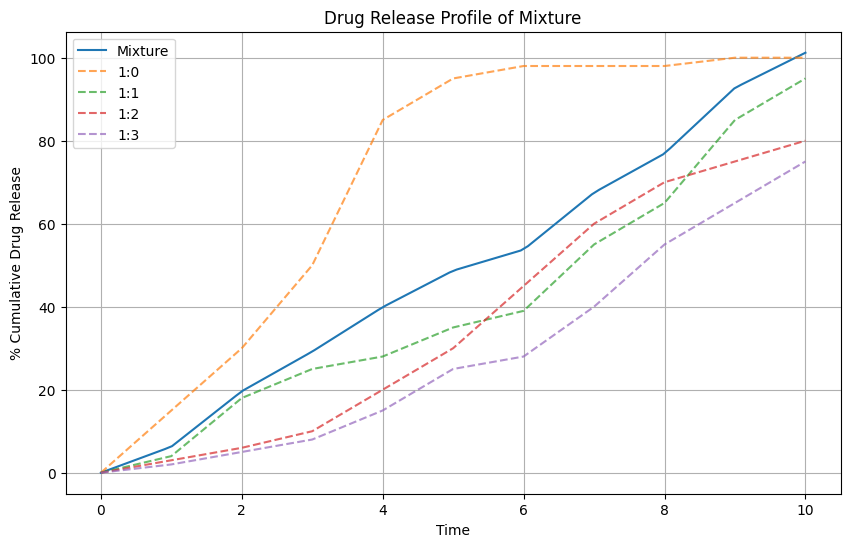

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Create dummy data
time_points = np.linspace(0, 10, 11)
release_1_0 = np.array([0, 15, 30, 50, 85, 95, 98, 98, 98, 100, 100])
release_1_1 = np.array([0, 4, 18, 25, 28, 35, 39, 55, 65, 85, 95])
release_1_2 = np.array([0, 3, 6, 10, 20, 30, 45, 60, 70, 75, 80])
release_1_3 = np.array([0, 2, 5, 8, 15, 25, 28, 40, 55, 65, 75])

# Create DataFrames for each type
data_1_0 = pd.DataFrame({'Time': time_points, 'CumulativeRelease': release_1_0})
data_1_1 = pd.DataFrame({'Time': time_points, 'CumulativeRelease': release_1_1})
data_1_2 = pd.DataFrame({'Time': time_points, 'CumulativeRelease': release_1_2})
data_1_3 = pd.DataFrame({'Time': time_points, 'CumulativeRelease': release_1_3})

# Assuming CSV files have columns 'Time' and 'CumulativeRelease'
common_time_points = np.linspace(0, 10, 100)

# Step 2: Interpolate data to common time points
interp_1_0 = interp1d(data_1_0['Time'], data_1_0['CumulativeRelease'], kind='linear', fill_value="extrapolate")
interp_1_1 = interp1d(data_1_1['Time'], data_1_1['CumulativeRelease'], kind='linear', fill_value="extrapolate")
interp_1_2 = interp1d(data_1_2['Time'], data_1_2['CumulativeRelease'], kind='linear', fill_value="extrapolate")
interp_1_3 = interp1d(data_1_3['Time'], data_1_3['CumulativeRelease'], kind='linear', fill_value="extrapolate")

release_1_0_interp = interp_1_0(common_time_points)
release_1_1_interp = interp_1_1(common_time_points)
release_1_2_interp = interp_1_2(common_time_points)
release_1_3_interp = interp_1_3(common_time_points)

# Step 3: Function to calculate weighted average release profile
def calculate_weighted_release(proportions):
    return (proportions[0] * release_1_0_interp +
            proportions[1] * release_1_1_interp +
            proportions[2] * release_1_2_interp +
            proportions[3] * release_1_3_interp)

# Example proportions: 20% 1:0, 30% 1:1, 0% 1:2, 50% 1:3
proportions = [0.2, 0.7, 0.09, 0.1]
weighted_release = calculate_weighted_release(proportions)

# Step 4: Plot the resulting drug release profile
plt.figure(figsize=(10, 6))
plt.plot(common_time_points, weighted_release, label='Mixture')
plt.plot(data_1_0['Time'], data_1_0['CumulativeRelease'], '--', label='1:0', alpha=0.7)
plt.plot(data_1_1['Time'], data_1_1['CumulativeRelease'], '--', label='1:1', alpha=0.7)
plt.plot(data_1_2['Time'], data_1_2['CumulativeRelease'], '--', label='1:2', alpha=0.7)
plt.plot(data_1_3['Time'], data_1_3['CumulativeRelease'], '--', label='1:3', alpha=0.7)
plt.xlabel('Time')
plt.ylabel('% Cumulative Drug Release')
plt.title('Drug Release Profile of Mixture')
plt.legend()
plt.grid(True)
plt.show()


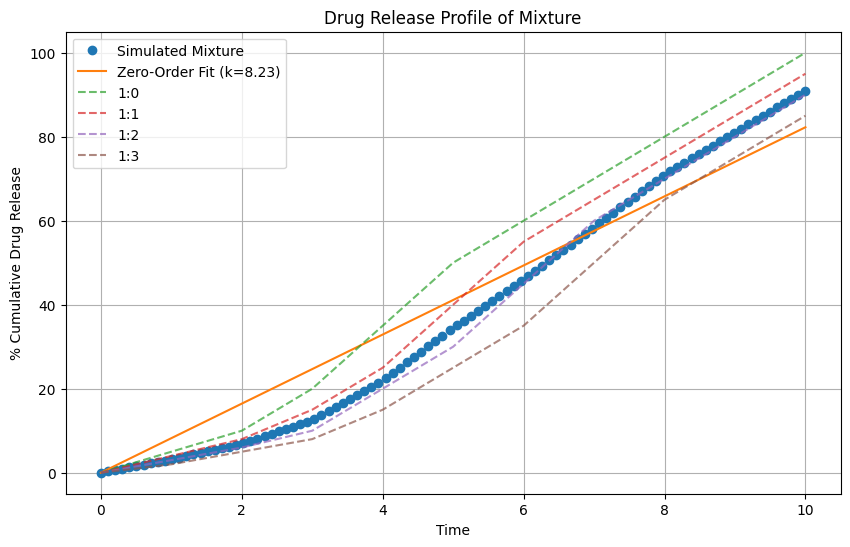

Zero-order rate constant: k = 8.23
Optimized proportions: [9.99999970e-01 4.05920750e-08 2.45184231e-08 0.00000000e+00]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit

# Dummy data for illustration (replace with your actual data)
time_points = np.linspace(0, 10, 11)  # 11 time points from 0 to 10
release_1_0 = np.array([0, 5, 10, 20, 35, 50, 60, 70, 80, 90, 100])  # Dummy release data for 1:0
release_1_1 = np.array([0, 4, 8, 15, 25, 40, 55, 65, 75, 85, 95])   # Dummy release data for 1:1
release_1_2 = np.array([0, 3, 6, 10, 20, 30, 45, 60, 70, 80, 90])   # Dummy release data for 1:2
release_1_3 = np.array([0, 2, 5, 8, 15, 25, 35, 50, 65, 75, 85])    # Dummy release data for 1:3

# Create DataFrames for each type
data_1_0 = pd.DataFrame({'Time': time_points, 'CumulativeRelease': release_1_0})
data_1_1 = pd.DataFrame({'Time': time_points, 'CumulativeRelease': release_1_1})
data_1_2 = pd.DataFrame({'Time': time_points, 'CumulativeRelease': release_1_2})
data_1_3 = pd.DataFrame({'Time': time_points, 'CumulativeRelease': release_1_3})

# Interpolating data to common time points
common_time_points = np.linspace(0, 10, 100)  # Common time points for interpolation
interp_1_0 = interp1d(data_1_0['Time'], data_1_0['CumulativeRelease'], kind='linear', fill_value="extrapolate")
interp_1_1 = interp1d(data_1_1['Time'], data_1_1['CumulativeRelease'], kind='linear', fill_value="extrapolate")
interp_1_2 = interp1d(data_1_2['Time'], data_1_2['CumulativeRelease'], kind='linear', fill_value="extrapolate")
interp_1_3 = interp1d(data_1_3['Time'], data_1_3['CumulativeRelease'], kind='linear', fill_value="extrapolate")

release_1_0_interp = interp_1_0(common_time_points)
release_1_1_interp = interp_1_1(common_time_points)
release_1_2_interp = interp_1_2(common_time_points)
release_1_3_interp = interp_1_3(common_time_points)

# Function to calculate weighted average release profile
def calculate_weighted_release(proportions):
    return (proportions[0] * release_1_0_interp +
            proportions[1] * release_1_1_interp +
            proportions[2] * release_1_2_interp +
            proportions[3] * release_1_3_interp)

# Fit the data to a zero-order kinetic model
def zero_order_kinetics(t, k):
    return k * t

# Example proportions: Adjust these to find the best fit
proportions = [0.2, 0.3, 0.0, 0.5]
weighted_release = calculate_weighted_release(proportions)

# Curve fitting to zero-order model
params, _ = curve_fit(zero_order_kinetics, common_time_points, weighted_release)
k = params[0]

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(common_time_points, weighted_release, 'o', label='Simulated Mixture')
plt.plot(common_time_points, zero_order_kinetics(common_time_points, k), '-', label=f'Zero-Order Fit (k={k:.2f})')
plt.plot(data_1_0['Time'], data_1_0['CumulativeRelease'], '--', label='1:0', alpha=0.7)
plt.plot(data_1_1['Time'], data_1_1['CumulativeRelease'], '--', label='1:1', alpha=0.7)
plt.plot(data_1_2['Time'], data_1_2['CumulativeRelease'], '--', label='1:2', alpha=0.7)
plt.plot(data_1_3['Time'], data_1_3['CumulativeRelease'], '--', label='1:3', alpha=0.7)
plt.xlabel('Time')
plt.ylabel('% Cumulative Drug Release')
plt.title('Drug Release Profile of Mixture')
plt.legend()
plt.grid(True)
plt.show()

# Printing the rate constant
print(f'Zero-order rate constant: k = {k:.2f}')

# Optimize proportions to achieve zero-order release
from scipy.optimize import minimize

def objective(proportions):
    weighted_release = calculate_weighted_release(proportions)
    params, _ = curve_fit(zero_order_kinetics, common_time_points, weighted_release)
    k = params[0]
    residuals = weighted_release - zero_order_kinetics(common_time_points, k)
    return np.sum(residuals**2)

initial_proportions = [0.25, 0.25, 0.25, 0.25]
bounds = [(0, 1), (0, 1), (0, 1), (0, 1)]
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

result = minimize(objective, initial_proportions, bounds=bounds, constraints=constraints)
optimized_proportions = result.x

print(f'Optimized proportions: {optimized_proportions}')


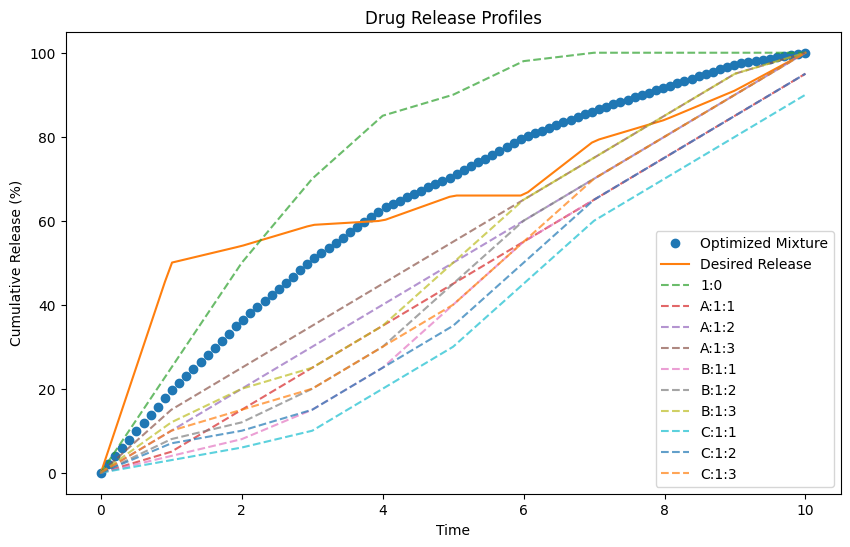

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.optimize import minimize

# Dummy data for illustration (replace with your actual data)
time_points = np.linspace(0, 10, 11)  # 11 time points from 0 to 10
release_1_0 = np.array([0, 25, 50, 70, 85, 90, 98, 100, 100, 100, 100])  # Dummy release data for 1:0

# Release data for different polymers (A, B, C) with ratios (1:1, 1:2, 1:3)
release_A_1_1 = np.array([0, 15, 25, 35, 40, 45, 50, 55, 65, 75, 95])
release_A_1_2 = np.array([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
release_A_1_3 = np.array([0, 5, 10, 15, 25, 35, 45, 55, 65, 75, 85])
release_B_1_1 = np.array([0, 4, 8, 15, 25, 40, 55, 65, 75, 85, 95])
release_B_1_2 = np.array([0, 8, 12, 20, 30, 45, 60, 70, 80, 90, 100])
release_B_1_3 = np.array([0, 12, 20, 25, 35, 50, 65, 75, 85, 95, 100])
release_C_1_1 = np.array([0, 3, 6, 10, 20, 30, 45, 60, 70, 80, 90])
release_C_1_2 = np.array([0, 7, 10, 15, 25, 35, 50, 65, 75, 85, 95])
release_C_1_3 = np.array([0, 10, 15, 20, 30, 40, 55, 70, 80, 90, 100])

# Create DataFrames for each type
data_1_0 = pd.DataFrame({'Time': time_points, 'CumulativeRelease': release_1_0})
data_A_1_1 = pd.DataFrame({'Time': time_points, 'CumulativeRelease': release_A_1_1})
data_A_1_2 = pd.DataFrame({'Time': time_points, 'CumulativeRelease': release_A_1_2})
data_A_1_3 = pd.DataFrame({'Time': time_points, 'CumulativeRelease': release_A_1_3})
data_B_1_1 = pd.DataFrame({'Time': time_points, 'CumulativeRelease': release_B_1_1})
data_B_1_2 = pd.DataFrame({'Time': time_points, 'CumulativeRelease': release_B_1_2})
data_B_1_3 = pd.DataFrame({'Time': time_points, 'CumulativeRelease': release_B_1_3})
data_C_1_1 = pd.DataFrame({'Time': time_points, 'CumulativeRelease': release_C_1_1})
data_C_1_2 = pd.DataFrame({'Time': time_points, 'CumulativeRelease': release_C_1_2})
data_C_1_3 = pd.DataFrame({'Time': time_points, 'CumulativeRelease': release_C_1_3})

# Interpolating data to common time points
common_time_points = np.linspace(0, 10, 100)  # Common time points for interpolation
interp_1_0 = interp1d(data_1_0['Time'], data_1_0['CumulativeRelease'], kind='linear', fill_value="extrapolate")
interp_A_1_1 = interp1d(data_A_1_1['Time'], data_A_1_1['CumulativeRelease'], kind='linear', fill_value="extrapolate")
interp_A_1_2 = interp1d(data_A_1_2['Time'], data_A_1_2['CumulativeRelease'], kind='linear', fill_value="extrapolate")
interp_A_1_3 = interp1d(data_A_1_3['Time'], data_A_1_3['CumulativeRelease'], kind='linear', fill_value="extrapolate")
interp_B_1_1 = interp1d(data_B_1_1['Time'], data_B_1_1['CumulativeRelease'], kind='linear', fill_value="extrapolate")
interp_B_1_2 = interp1d(data_B_1_2['Time'], data_B_1_2['CumulativeRelease'], kind='linear', fill_value="extrapolate")
interp_B_1_3 = interp1d(data_B_1_3['Time'], data_B_1_3['CumulativeRelease'], kind='linear', fill_value="extrapolate")
interp_C_1_1 = interp1d(data_C_1_1['Time'], data_C_1_1['CumulativeRelease'], kind='linear', fill_value="extrapolate")
interp_C_1_2 = interp1d(data_C_1_2['Time'], data_C_1_2['CumulativeRelease'], kind='linear', fill_value="extrapolate")
interp_C_1_3 = interp1d(data_C_1_3['Time'], data_C_1_3['CumulativeRelease'], kind='linear', fill_value="extrapolate")

release_1_0_interp = interp_1_0(common_time_points)
release_A_1_1_interp = interp_A_1_1(common_time_points)
release_A_1_2_interp = interp_A_1_2(common_time_points)
release_A_1_3_interp = interp_A_1_3(common_time_points)
release_B_1_1_interp = interp_B_1_1(common_time_points)
release_B_1_2_interp = interp_B_1_2(common_time_points)
release_B_1_3_interp = interp_B_1_3(common_time_points)
release_C_1_1_interp = interp_C_1_1(common_time_points)
release_C_1_2_interp = interp_C_1_2(common_time_points)
release_C_1_3_interp = interp_C_1_3(common_time_points)

# Function to calculate weighted average release profile
def calculate_weighted_release(proportions):
    return (proportions[0] * release_1_0_interp +
            proportions[1] * release_A_1_1_interp +
            proportions[2] * release_A_1_2_interp +
            proportions[3] * release_A_1_3_interp +
            proportions[4] * release_B_1_1_interp +
            proportions[5] * release_B_1_2_interp +
            proportions[6] * release_B_1_3_interp +
            proportions[7] * release_C_1_1_interp +
            proportions[8] * release_C_1_2_interp +
            proportions[9] * release_C_1_3_interp)

# Desired drug release pattern (replace with your actual data)
desired_release = np.array([0, 50, 54, 59, 60, 66, 66, 79, 84, 91, 100])  # Example desired release

# Interpolating desired release to common time points
interp_desired_release = interp1d(time_points, desired_release, kind='linear', fill_value="extrapolate")
desired_release_interp = interp_desired_release(common_time_points)

# Objective function to minimize the difference between the weighted release and desired release
def objective(proportions):
    weighted_release = calculate_weighted_release(proportions)
    residuals = weighted_release - desired_release_interp
    return np.sum(residuals**2)

# Initial proportions (must sum to 1)
initial_proportions = np.ones(10) / 10
bounds = [(0, 1)] * 10
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

# Optimize proportions
result = minimize(objective, initial_proportions, bounds=bounds, constraints=constraints)
optimized_proportions = result.x

# Calculate the optimized weighted release
optimized_weighted_release = calculate_weighted_release(optimized_proportions)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(common_time_points, optimized_weighted_release, 'o', label='Optimized Mixture')
plt.plot(common_time_points, desired_release_interp, '-', label='Desired Release')
plt.plot(data_1_0['Time'], data_1_0['CumulativeRelease'], '--', label='1:0', alpha=0.7)
plt.plot(data_A_1_1['Time'], data_A_1_1['CumulativeRelease'], '--', label='A:1:1', alpha=0.7)
plt.plot(data_A_1_2['Time'], data_A_1_2['CumulativeRelease'], '--', label='A:1:2', alpha=0.7)
plt.plot(data_A_1_3['Time'], data_A_1_3['CumulativeRelease'], '--', label='A:1:3', alpha=0.7)
plt.plot(data_B_1_1['Time'], data_B_1_1['CumulativeRelease'], '--', label='B:1:1', alpha=0.7)
plt.plot(data_B_1_2['Time'], data_B_1_2['CumulativeRelease'], '--', label='B:1:2', alpha=0.7)
plt.plot(data_B_1_3['Time'], data_B_1_3['CumulativeRelease'], '--', label='B:1:3', alpha=0.7)
plt.plot(data_C_1_1['Time'], data_C_1_1['CumulativeRelease'], '--', label='C:1:1', alpha=0.7)
plt.plot(data_C_1_2['Time'], data_C_1_2['CumulativeRelease'], '--', label='C:1:2', alpha=0.7)
plt.plot(data_C_1_3['Time'], data_C_1_3['CumulativeRelease'], '--', label='C:1:3', alpha=0.7)

plt.xlabel('Time')
plt.ylabel('Cumulative Release (%)')
plt.legend()
plt.title('Drug Release Profiles')

plt.savefig('/content/drug_release.png', format='png', dpi=600)

# Display the plot
plt.show()

from google.colab import files

files.download('/content/drug_release.png')

plt.show()


**ZERO ORDER RELEASE**

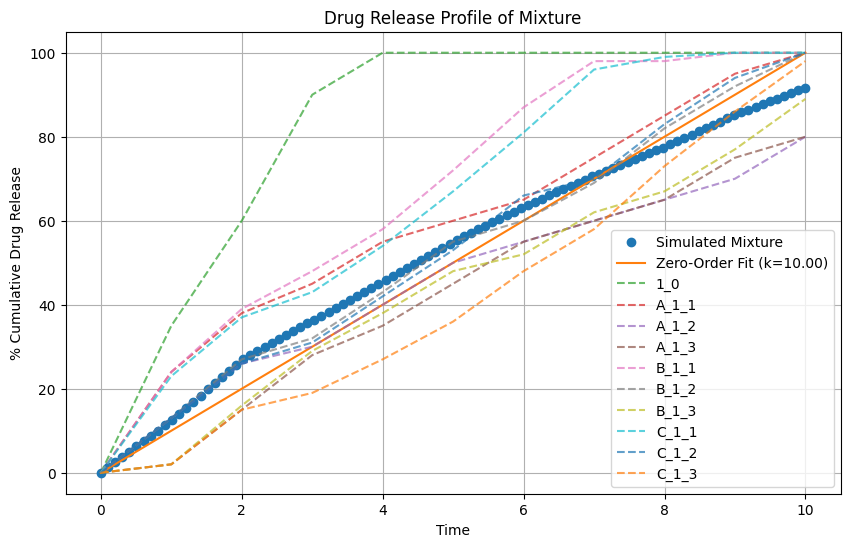

Optimized proportions: [0.07272343 0.07291525 0.15422292 0.19411394 0.07295481 0.07284172
 0.10044152 0.07291261 0.07295942 0.11391439]
Zero-order rate constant: k = 10.00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit, minimize

# Dummy data for illustration (replace with your actual data)
time_points = np.linspace(0, 10, 11)  # 11 time points from 0 to 10
release_profiles = {
    '1_0': np.array([0, 35, 60, 90, 100, 100, 100, 100, 100, 100, 100]),
    'A_1_1': np.array([0, 24, 38, 45, 55, 60, 65, 75, 85, 95, 100]),
    'A_1_2': np.array([0, 13, 26, 30, 40, 50, 55, 60, 65, 70, 80]),
    'A_1_3': np.array([0, 2, 15, 28, 35, 45, 55, 60, 65, 75, 80]),
    'B_1_1': np.array([0, 24, 39, 48, 58, 72, 87, 98, 98, 100, 100]),
    'B_1_2': np.array([0, 13, 27, 32, 43, 55, 60, 69, 82, 92, 100]),
    'B_1_3': np.array([0, 2, 16, 29, 38, 48, 52, 62, 67, 77, 89]),
    'C_1_1': np.array([0, 23, 37, 43, 54, 67, 81, 96, 99, 100, 100]),
    'C_1_2': np.array([0, 13, 26, 31, 42, 53, 66, 70, 83, 94, 100]),
    'C_1_3': np.array([0, 2, 15, 19, 27, 36, 48, 58, 73, 86, 98])
}

# Create DataFrames for each type
data_frames = {key: pd.DataFrame({'Time': time_points, 'CumulativeRelease': value}) for key, value in release_profiles.items()}

# Interpolating data to common time points
common_time_points = np.linspace(0, 10, 100)  # Common time points for interpolation
interp_functions = {key: interp1d(df['Time'], df['CumulativeRelease'], kind='linear', fill_value="extrapolate") for key, df in data_frames.items()}
interpolated_releases = {key: interp(common_time_points) for key, interp in interp_functions.items()}

# Function to calculate weighted average release profile
def calculate_weighted_release(proportions):
    weighted_release = np.zeros_like(common_time_points)
    for i, key in enumerate(interpolated_releases.keys()):
        weighted_release += proportions[i] * interpolated_releases[key]
    return weighted_release

# Fit the data to a zero-order kinetic model
def zero_order_kinetics(t, k):
    return k * t

# Function to find optimal proportions for a desired zero-order rate constant k
def optimize_proportions(desired_k):
    def objective(proportions):
        weighted_release = calculate_weighted_release(proportions)
        params, _ = curve_fit(zero_order_kinetics, common_time_points, weighted_release)
        k = params[0]
        return (k - desired_k)**2

    initial_proportions = np.ones(len(interpolated_releases)) / len(interpolated_releases)
    bounds = [(0, 1) for _ in range(len(interpolated_releases))]
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

    result = minimize(objective, initial_proportions, bounds=bounds, constraints=constraints)
    return result.x

# Example usage: find proportions for a desired zero-order rate constant k
desired_k = 10.0  # Replace with your desired zero-order rate constant
optimized_proportions = optimize_proportions(desired_k)
weighted_release = calculate_weighted_release(optimized_proportions)

# Curve fitting to zero-order model
params, _ = curve_fit(zero_order_kinetics, common_time_points, weighted_release)
k = params[0]

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(common_time_points, weighted_release, 'o', label='Simulated Mixture')
plt.plot(common_time_points, zero_order_kinetics(common_time_points, k), '-', label=f'Zero-Order Fit (k={k:.2f})')
for key, df in data_frames.items():
    plt.plot(df['Time'], df['CumulativeRelease'], '--', label=key, alpha=0.7)
plt.xlabel('Time')
plt.ylabel('% Cumulative Drug Release')
plt.title('Drug Release Profile of Mixture')
plt.legend()
plt.grid(True)
plt.show()

# Printing the optimized proportions and the rate constant
print(f'Optimized proportions: {optimized_proportions}')
print(f'Zero-order rate constant: k = {k:.2f}')


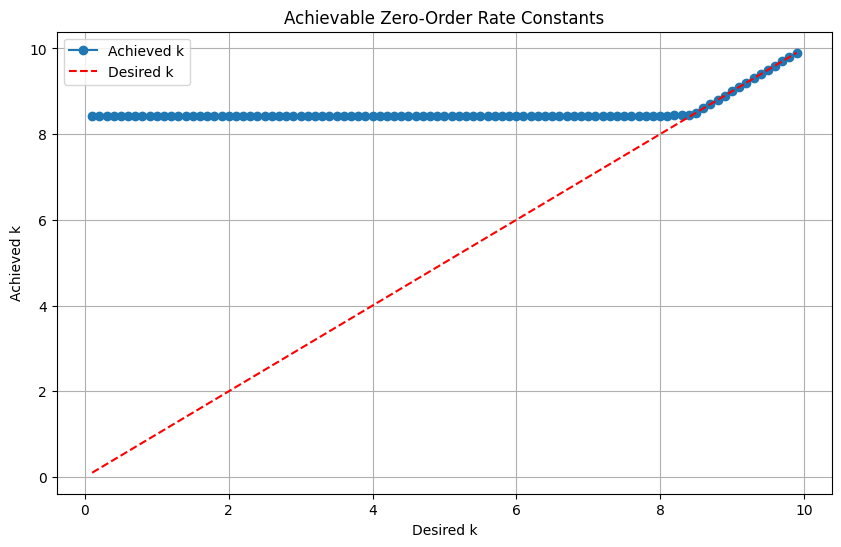

Desired k: 0.10, Achieved k: 8.43, Error: 6.94e+01
Desired k: 0.20, Achieved k: 8.43, Error: 6.78e+01
Desired k: 0.30, Achieved k: 8.43, Error: 6.61e+01
Desired k: 0.40, Achieved k: 8.43, Error: 6.45e+01
Desired k: 0.50, Achieved k: 8.43, Error: 6.29e+01
Desired k: 0.60, Achieved k: 8.43, Error: 6.13e+01
Desired k: 0.70, Achieved k: 8.43, Error: 5.98e+01
Desired k: 0.80, Achieved k: 8.43, Error: 5.82e+01
Desired k: 0.90, Achieved k: 8.43, Error: 5.67e+01
Desired k: 1.00, Achieved k: 8.43, Error: 5.52e+01
Desired k: 1.10, Achieved k: 8.43, Error: 5.37e+01
Desired k: 1.20, Achieved k: 8.43, Error: 5.23e+01
Desired k: 1.30, Achieved k: 8.43, Error: 5.09e+01
Desired k: 1.40, Achieved k: 8.43, Error: 4.94e+01
Desired k: 1.50, Achieved k: 8.43, Error: 4.80e+01
Desired k: 1.60, Achieved k: 8.43, Error: 4.67e+01
Desired k: 1.70, Achieved k: 8.43, Error: 4.53e+01
Desired k: 1.80, Achieved k: 8.43, Error: 4.40e+01
Desired k: 1.90, Achieved k: 8.43, Error: 4.27e+01
Desired k: 2.00, Achieved k: 8.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit, minimize

# Updated data for illustration
time_points = np.linspace(0, 10, 11)  # 11 time points from 0 to 10
release_profiles = {
    '1_0': np.array([0, 35, 60, 90, 100, 100, 100, 100, 100, 100, 100]),
    'A_1_1': np.array([0, 24, 38, 45, 55, 60, 65, 75, 85, 95, 100]),
    'A_1_2': np.array([0, 13, 26, 30, 40, 50, 55, 60, 65, 70, 80]),
    'A_1_3': np.array([0, 2, 15, 28, 35, 45, 55, 60, 65, 75, 80]),
    'B_1_1': np.array([0, 24, 39, 48, 58, 72, 87, 98, 98, 100, 100]),
    'B_1_2': np.array([0, 13, 27, 32, 43, 55, 60, 69, 82, 92, 100]),
    'B_1_3': np.array([0, 2, 16, 29, 38, 48, 52, 62, 67, 77, 89]),
    'C_1_1': np.array([0, 23, 37, 43, 54, 67, 81, 96, 99, 100, 100]),
    'C_1_2': np.array([0, 13, 26, 31, 42, 53, 66, 70, 83, 94, 100]),
    'C_1_3': np.array([0, 2, 15, 19, 27, 36, 48, 58, 73, 86, 98])
}

# Create DataFrames for each type
data_frames = {key: pd.DataFrame({'Time': time_points, 'CumulativeRelease': value}) for key, value in release_profiles.items()}

# Interpolating data to common time points
common_time_points = np.linspace(0, 10, 100)  # Common time points for interpolation
interp_functions = {key: interp1d(df['Time'], df['CumulativeRelease'], kind='linear', fill_value="extrapolate") for key, df in data_frames.items()}
interpolated_releases = {key: interp(common_time_points) for key, interp in interp_functions.items()}

# Function to calculate weighted average release profile
def calculate_weighted_release(proportions):
    weighted_release = np.zeros_like(common_time_points)
    for i, key in enumerate(interpolated_releases.keys()):
        weighted_release += proportions[i] * interpolated_releases[key]
    return weighted_release

# Fit the data to a zero-order kinetic model
def zero_order_kinetics(t, k):
    return k * t

# Function to find optimal proportions for a desired zero-order rate constant k
def optimize_proportions(desired_k):
    def objective(proportions):
        weighted_release = calculate_weighted_release(proportions)
        params, _ = curve_fit(zero_order_kinetics, common_time_points, weighted_release)
        k = params[0]
        return (k - desired_k)**2

    initial_proportions = np.ones(len(interpolated_releases)) / len(interpolated_releases)
    bounds = [(0, 1) for _ in range(len(interpolated_releases))]
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

    result = minimize(objective, initial_proportions, bounds=bounds, constraints=constraints)
    return result.x, result.fun

# Function to find the range of achievable k values
def find_achievable_k_range(min_k, max_k, step_k):
    achievable_ks = []
    for desired_k in np.arange(min_k, max_k, step_k):
        optimized_proportions, optimization_error = optimize_proportions(desired_k)
        weighted_release = calculate_weighted_release(optimized_proportions)
        params, _ = curve_fit(zero_order_kinetics, common_time_points, weighted_release)
        achieved_k = params[0]
        achievable_ks.append((desired_k, achieved_k, optimization_error))
    return achievable_ks

# Example usage: find the range of achievable k values
min_k = 0.1
max_k = 10.0
step_k = 0.1
achievable_ks = find_achievable_k_range(min_k, max_k, step_k)

# Plot the results
desired_ks, achieved_ks, errors = zip(*achievable_ks)

plt.figure(figsize=(10, 6))
plt.plot(desired_ks, achieved_ks, 'o-', label='Achieved k')
plt.plot(desired_ks, desired_ks, 'r--', label='Desired k')
plt.xlabel('Desired k')
plt.ylabel('Achieved k')
plt.title('Achievable Zero-Order Rate Constants')
plt.legend()
plt.grid(True)
plt.show()

# Printing the achievable k values and their corresponding errors
for desired_k, achieved_k, error in achievable_ks:
    print(f'Desired k: {desired_k:.2f}, Achieved k: {achieved_k:.2f}, Error: {error:.2e}')


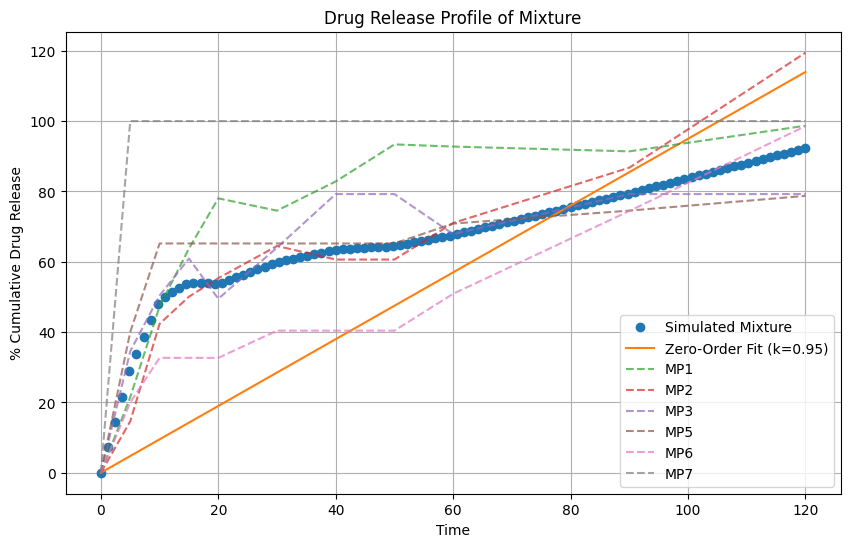

Optimized proportions: [0.09266591 0.13797635 0.21907304 0.24927531 0.27339845 0.02761094]
Zero-order rate constant: k = 0.95


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit, minimize

# Load the data from the .csv file
data = pd.read_csv('Data2.csv')

# Extract time points and cumulative release profiles
time_points = data['Time'].values  # Assuming the 'Time' column represents time points
release_profiles = {col: data[col].values for col in data.columns if col != 'Time'}

# Create DataFrames for each profile
data_frames = {key: pd.DataFrame({'Time': time_points, 'CumulativeRelease': value}) for key, value in release_profiles.items()}

# Interpolating data to common time points
common_time_points = np.linspace(min(time_points), max(time_points), 100)  # Common time points for interpolation
interp_functions = {key: interp1d(df['Time'], df['CumulativeRelease'], kind='linear', fill_value="extrapolate") for key, df in data_frames.items()}
interpolated_releases = {key: interp(common_time_points) for key, interp in interp_functions.items()}

# Function to calculate weighted average release profile
def calculate_weighted_release(proportions):
    weighted_release = np.zeros_like(common_time_points)
    for i, key in enumerate(interpolated_releases.keys()):
        weighted_release += proportions[i] * interpolated_releases[key]
    return weighted_release

# Fit the data to a zero-order kinetic model
def zero_order_kinetics(t, k):
    return k * t

# Function to find optimal proportions for a desired zero-order rate constant k
def optimize_proportions(desired_k):
    def objective(proportions):
        weighted_release = calculate_weighted_release(proportions)
        params, _ = curve_fit(zero_order_kinetics, common_time_points, weighted_release)
        k = params[0]
        return (k - desired_k)**2

    initial_proportions = np.ones(len(interpolated_releases)) / len(interpolated_releases)
    bounds = [(0, 1) for _ in range(len(interpolated_releases))]
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

    result = minimize(objective, initial_proportions, bounds=bounds, constraints=constraints)
    return result.x

# Example usage: find proportions for a desired zero-order rate constant k
desired_k = 0.95 # Replace with your desired zero-order rate constant
optimized_proportions = optimize_proportions(desired_k)
weighted_release = calculate_weighted_release(optimized_proportions)

# Curve fitting to zero-order model
params, _ = curve_fit(zero_order_kinetics, common_time_points, weighted_release)
k = params[0]

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(common_time_points, weighted_release, 'o', label='Simulated Mixture')
plt.plot(common_time_points, zero_order_kinetics(common_time_points, k), '-', label=f'Zero-Order Fit (k={k:.2f})')
for key, df in data_frames.items():
    plt.plot(df['Time'], df['CumulativeRelease'], '--', label=key, alpha=0.7)
plt.xlabel('Time')
plt.ylabel('% Cumulative Drug Release')
plt.title('Drug Release Profile of Mixture')
plt.legend()
plt.grid(True)
plt.show()

# Printing the optimized proportions and the rate constant
print(f'Optimized proportions: {optimized_proportions}')
print(f'Zero-order rate constant: k = {k:.2f}')


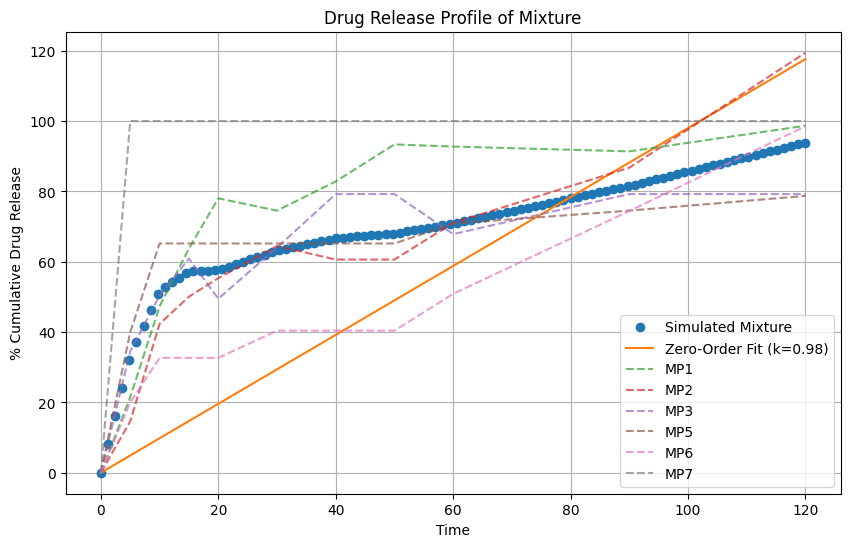

Optimized proportions: [0.12536833 0.1503     0.19941462 0.20799744 0.23233358 0.08458604]
Zero-order rate constant: k = 0.98
Mass of each microparticle (in same unit as given input): {'MP1': 87.7578277846972, 'MP2': 90.17999805152607, 'MP3': 99.70731114320178, 'MP5': 62.39923151220953, 'MP6': 46.46671511057207, 'MP7': 8.458604162745067}
Total mass of the mixture: 394.96968776495174


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit, minimize

# Load the data from the .csv file
data = pd.read_csv('Data2.csv')

# Extract time points and cumulative release profiles
time_points = data['Time'].values
release_profiles = {col: data[col].values for col in data.columns if col != 'Time'}

# Drug content is now based on weight equivalent to 100mg drug
drug_content_per_microparticle = {
    'MP1': 100/700,  # 100mg drug in 700 units of MP1, so mg/unit is 100/700
    'MP2': 100/600,
    'MP3': 100/500,
    'MP4': 100/400,
    'MP5': 100/300,
    'MP6': 100/200,
    'MP7': 100/100,
}

# Create DataFrames for each profile
data_frames = {key: pd.DataFrame({'Time': time_points, 'CumulativeRelease': value}) for key, value in release_profiles.items()}

# Interpolating data to common time points
common_time_points = np.linspace(min(time_points), max(time_points), 100)
interp_functions = {key: interp1d(df['Time'], df['CumulativeRelease'], kind='linear', fill_value="extrapolate") for key, df in data_frames.items()}
interpolated_releases = {key: interp(common_time_points) for key, interp in interp_functions.items()}

# Function to calculate weighted average release profile
def calculate_weighted_release(proportions):
    weighted_release = np.zeros_like(common_time_points)
    for i, key in enumerate(interpolated_releases.keys()):
        weighted_release += proportions[i] * interpolated_releases[key]
    return weighted_release

# Fit the data to a zero-order kinetic model
def zero_order_kinetics(t, k):
    return k * t

# Function to find optimal proportions for a desired zero-order rate constant k
def optimize_proportions(desired_k):
    def objective(proportions):
        weighted_release = calculate_weighted_release(proportions)
        params, _ = curve_fit(zero_order_kinetics, common_time_points, weighted_release)
        k = params[0]
        return (k - desired_k)**2

    initial_proportions = np.ones(len(interpolated_releases)) / len(interpolated_releases)
    bounds = [(0, 1) for _ in range(len(interpolated_releases))]
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

    result = minimize(objective, initial_proportions, bounds=bounds, constraints=constraints)
    return result.x

# Example usage: find proportions for a desired zero-order rate constant k
desired_k = 0.98  # Replace with your desired zero-order rate constant
optimized_proportions = optimize_proportions(desired_k)
weighted_release = calculate_weighted_release(optimized_proportions)

# Curve fitting to zero-order model
params, _ = curve_fit(zero_order_kinetics, common_time_points, weighted_release)
k = params[0]

# Calculate the mass of each microparticle type needed for a 100mg total drug load
total_drug_needed = 100  # mg
mass_per_microparticle = {}
for i, key in enumerate(interpolated_releases.keys()):
    mass_per_microparticle[key] = (optimized_proportions[i] * total_drug_needed) / drug_content_per_microparticle[key]


# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(common_time_points, weighted_release, 'o', label='Simulated Mixture')
plt.plot(common_time_points, zero_order_kinetics(common_time_points, k), '-', label=f'Zero-Order Fit (k={k:.2f})')
for key, df in data_frames.items():
    plt.plot(df['Time'], df['CumulativeRelease'], '--', label=key, alpha=0.7)
plt.xlabel('Time')
plt.ylabel('% Cumulative Drug Release')
plt.title('Drug Release Profile of Mixture')
plt.legend()
plt.grid(True)
plt.show()

# Printing the optimized proportions, rate constant, and mass of each microparticle
print(f'Optimized proportions: {optimized_proportions}')
print(f'Zero-order rate constant: k = {k:.2f}')
print(f'Mass of each microparticle (in same unit as given input): {mass_per_microparticle}')


total_mass = sum(mass_per_microparticle.values())
print(f"Total mass of the mixture: {total_mass}")

In [ ]:
# Printing the optimized proportions, rate constant, and mass of each microparticle
print(f'Optimized proportions: {optimized_proportions}')
print(f'Zero-order rate constant: k = {k:.2f}')
print(f'Mass of each microparticle (in same unit as given input): {mass_per_microparticle}')


total_mass = sum(mass_per_microparticle.values())
print(f"Total mass of the mixture: {total_mass}")

Optimized proportions: [0.12536833 0.1503     0.19941462 0.20799744 0.23233358 0.08458604]
Zero-order rate constant: k = 0.98
Mass of each microparticle (in same unit as given input): {'MP1': 87.7578277846972, 'MP2': 90.17999805152607, 'MP3': 99.70731114320178, 'MP5': 62.39923151220953, 'MP6': 46.46671511057207, 'MP7': 8.458604162745067}
Total mass of the mixture: 394.96968776495174


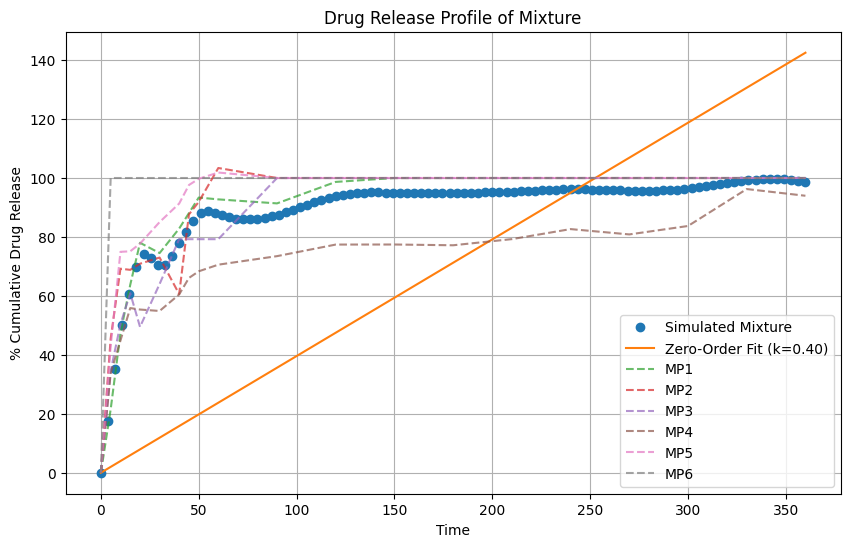

Optimized proportions: [7.77267970e-01 0.00000000e+00 0.00000000e+00 2.22732030e-01
 1.64365049e-16 1.90819582e-17]
Zero-order rate constant: k = 0.40
Mass of each microparticle (in same unit as given input): {'MP1': 544.0875792070949, 'MP2': 0.0, 'MP3': 0.0, 'MP4': 89.09281188165996, 'MP5': 4.93095148046407e-14, 'MP6': 3.8163916471489725e-15}
Total mass of the mixture: 633.1803910887548


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit, minimize

# Load the data from the .csv file
data = pd.read_csv('data2.csv')

# Extract time points and cumulative release profiles
time_points = data['Time'].values
release_profiles = {col: data[col].values for col in data.columns if col != 'Time'}

# Drug content per microparticle
# (mg of drug per unit microparticle)
drug_content_per_microparticle = {
    'MP1': 100/700,
    'MP2': 100/600,
    'MP3': 100/500,
    'MP4': 100/400,
    'MP5': 100/300,
    'MP6': 100/200,
    'MP7': 100/100,
}

# Create DataFrames for each profile
data_frames = {key: pd.DataFrame({'Time': time_points, 'CumulativeRelease': value}) for key, value in release_profiles.items()}

# Interpolating data to common time points with cubic interpolation
common_time_points = np.linspace(min(time_points), max(time_points), 100)
interp_functions = {key: interp1d(df['Time'], df['CumulativeRelease'], kind='cubic', fill_value='extrapolate') for key, df in data_frames.items()}
interpolated_releases = {key: interp(common_time_points) for key, interp in interp_functions.items()}

# Function to calculate weighted average release profile
def calculate_weighted_release(proportions):
    weighted_release = np.zeros_like(common_time_points)
    for i, key in enumerate(interpolated_releases.keys()):
        weighted_release += proportions[i] * interpolated_releases[key]
    return weighted_release

# Fit the data to a zero-order kinetic model
def zero_order_kinetics(t, k):
    return k * t

# Find the index where time = 10 min
fit_start_index = np.where(common_time_points >= 10)[0][0]

# Function to find optimal proportions ensuring zero-order release & 50mg in 10min
def optimize_proportions(desired_k):
    def objective(proportions):
        weighted_release = calculate_weighted_release(proportions)
        params, _ = curve_fit(zero_order_kinetics, common_time_points[fit_start_index:], weighted_release[fit_start_index:])
        k = params[0]
        return (k - desired_k)**2

    # Constraints: proportions must sum to 1 and release 50 mg in 10 min
    constraints = [
        {'type': 'eq', 'fun': lambda x: np.sum(x) - 1},  # Sum of proportions = 1
        {'type': 'eq', 'fun': lambda x: calculate_weighted_release(x)[fit_start_index] - 50}  # 50 mg at 10 min
    ]

    # Initial guess and bounds
    initial_proportions = np.ones(len(interpolated_releases)) / len(interpolated_releases)
    bounds = [(0, 1) for _ in range(len(interpolated_releases))]

    # Optimization
    result = minimize(objective, initial_proportions, bounds=bounds, constraints=constraints)

    # Clip to prevent negatives & normalize
    optimized_proportions = np.clip(result.x, 0, 1)
    optimized_proportions /= np.sum(optimized_proportions)

    return optimized_proportions

# Example usage: find proportions for a desired zero-order rate constant k
desired_k = 0.98  # Replace with desired zero-order rate constant
optimized_proportions = optimize_proportions(desired_k)
weighted_release = calculate_weighted_release(optimized_proportions)

# Curve fitting to zero-order model after 10 min
params, _ = curve_fit(zero_order_kinetics, common_time_points[fit_start_index:], weighted_release[fit_start_index:])
k = params[0]

# Calculate mass of each microparticle needed for a 100 mg total drug load
total_drug_needed = 100  # mg
mass_per_microparticle = {}
for i, key in enumerate(interpolated_releases.keys()):
    mass_per_microparticle[key] = (optimized_proportions[i] * total_drug_needed) / drug_content_per_microparticle[key]

# Validate total mass is feasible
total_mass = sum(mass_per_microparticle.values())
if total_mass > 1000:  # Adjust this threshold based on experimental feasibility
    print("Warning: The total mass exceeds experimental feasibility. Consider revising constraints.")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(common_time_points, weighted_release, 'o', label='Simulated Mixture')
plt.plot(common_time_points, zero_order_kinetics(common_time_points, k), '-', label=f'Zero-Order Fit (k={k:.2f})')
for key, df in data_frames.items():
    plt.plot(df['Time'], df['CumulativeRelease'], '--', label=key, alpha=0.7)
plt.xlabel('Time')
plt.ylabel('% Cumulative Drug Release')
plt.title('Drug Release Profile of Mixture')
plt.legend()
plt.grid(True)
plt.show()

# Printing the optimized proportions, rate constant, and mass of each microparticle
print(f'Optimized proportions: {optimized_proportions}')
print(f'Zero-order rate constant: k = {k:.2f}')
print(f'Mass of each microparticle (in same unit as given input): {mass_per_microparticle}')
print(f"Total mass of the mixture: {total_mass}")

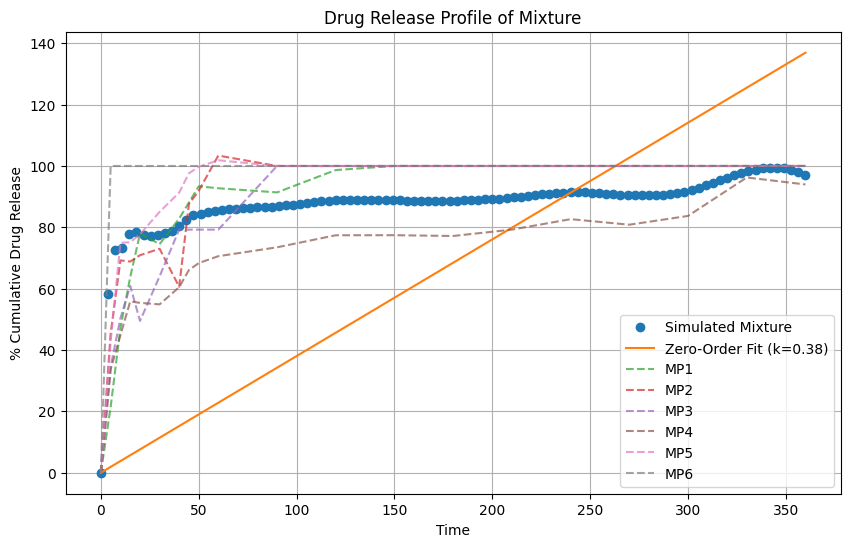

Optimized proportions: [0.00000000e+00 0.00000000e+00 0.00000000e+00 4.94946536e-01
 6.98233983e-17 5.05053464e-01]
Zero-order rate constant: k = 0.38
Mass of each microparticle (in same unit as given input): {'MP1': 0.0, 'MP2': 0.0, 'MP3': 0.0, 'MP4': 346.46257490419123, 'MP5': 3.142052924121293e-14, 'MP6': 50.50534644225839}
Total mass of the mixture: 396.96792134644966


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit, minimize

# Load the data from the .csv file
data = pd.read_csv('/content/data2.csv')

# Extract time points and cumulative release profiles
time_points = data['Time'].values
release_profiles = {col: data[col].values for col in data.columns if col != 'Time'}

# Drug content per microparticle
drug_content_per_microparticle = {
    'MP1': 100/700,
    'MP2': 100/500,
    'MP3': 100/500,
    'MP4': 100/700,
    'MP5': 100/450,
    'MP6': 100/100,
}

# Categorize microparticles based on release profiles
immediate_release = ['MP6']  # MP6 is always immediate release
sustained_release = [key for key in release_profiles.keys() if key != 'MP6']  # Rest are SR microparticles

# Create DataFrames for each profile
data_frames = {key: pd.DataFrame({'Time': time_points, 'CumulativeRelease': value}) for key, value in release_profiles.items()}

# Interpolating data to common time points with cubic interpolation
common_time_points = np.linspace(min(time_points), max(time_points), 100)
interp_functions = {key: interp1d(df['Time'], df['CumulativeRelease'], kind='cubic', fill_value='extrapolate') for key, df in data_frames.items()}
interpolated_releases = {key: interp(common_time_points) for key, interp in interp_functions.items()}

# Function to calculate weighted average release profile
def calculate_weighted_release(proportions):
    weighted_release = np.zeros_like(common_time_points)
    for i, key in enumerate(interpolated_releases.keys()):
        weighted_release += proportions[i] * interpolated_releases[key]
    return weighted_release

# Fit the data to a zero-order kinetic model
def zero_order_kinetics(t, k):
    return k * t

# Find the index where time = 10 min
fit_start_index = np.where(common_time_points >= 10)[0][0]

# Function to find optimal proportions ensuring zero-order release & 50mg in 10min
def optimize_proportions(desired_k):
    def objective(proportions):
        weighted_release = calculate_weighted_release(proportions)
        params, _ = curve_fit(zero_order_kinetics, common_time_points[fit_start_index:], weighted_release[fit_start_index:])
        k = params[0]
        return (k - desired_k)**2

    # Constraints: proportions must sum to 1, release 50 mg in 10 min from IR microparticles
    constraints = [
        {'type': 'eq', 'fun': lambda x: np.sum(x) - 1},  # Sum of proportions = 1
        {'type': 'eq', 'fun': lambda x: x[list(interpolated_releases.keys()).index('MP6')] * interpolated_releases['MP6'][fit_start_index] - 50}  # 50 mg at 10 min
    ]

    # Initial guess and bounds
    initial_proportions = np.ones(len(interpolated_releases)) / len(interpolated_releases)
    bounds = [(0, 1) for _ in range(len(interpolated_releases))]

    # Optimization
    result = minimize(objective, initial_proportions, bounds=bounds, constraints=constraints)

    # Clip to prevent negatives & normalize
    optimized_proportions = np.clip(result.x, 0, 1)
    optimized_proportions /= np.sum(optimized_proportions)

    return optimized_proportions

# Example usage: find proportions for a desired zero-order rate constant k
desired_k = 0.001  # Replace with desired zero-order rate constant
optimized_proportions = optimize_proportions(desired_k)
weighted_release = calculate_weighted_release(optimized_proportions)

# Curve fitting to zero-order model after 10 min
params, _ = curve_fit(zero_order_kinetics, common_time_points[fit_start_index:], weighted_release[fit_start_index:])
k = params[0]

# Calculate mass of each microparticle needed for a 100 mg total drug load
total_drug_needed = 100  # mg
mass_per_microparticle = {}
for i, key in enumerate(interpolated_releases.keys()):
    mass_per_microparticle[key] = (optimized_proportions[i] * total_drug_needed) / drug_content_per_microparticle[key]

# Validate total mass is feasible
total_mass = sum(mass_per_microparticle.values())
if total_mass > 1000:  # Adjust this threshold based on experimental feasibility
    print("Warning: The total mass exceeds experimental feasibility. Consider revising constraints.")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(common_time_points, weighted_release, 'o', label='Simulated Mixture')
plt.plot(common_time_points, zero_order_kinetics(common_time_points, k), '-', label=f'Zero-Order Fit (k={k:.2f})')
for key, df in data_frames.items():
    plt.plot(df['Time'], df['CumulativeRelease'], '--', label=key, alpha=0.7)
plt.xlabel('Time')
plt.ylabel('% Cumulative Drug Release')
plt.title('Drug Release Profile of Mixture')
plt.legend()
plt.grid(True)
plt.show()

# Printing the optimized proportions, rate constant, and mass of each microparticle
print(f'Optimized proportions: {optimized_proportions}')
print(f'Zero-order rate constant: k = {k:.2f}')
print(f'Mass of each microparticle (in same unit as given input): {mass_per_microparticle}')
print(f"Total mass of the mixture: {total_mass}")


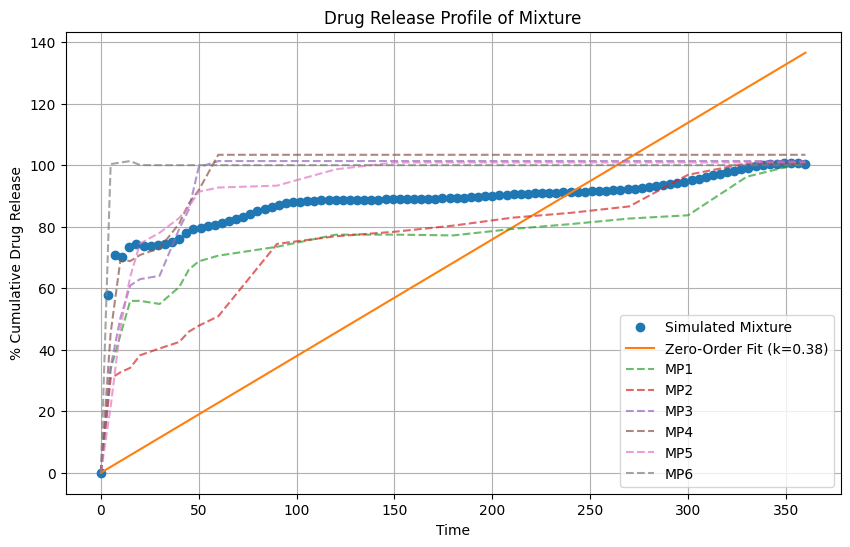

Optimized proportions: [2.72036869e-01 2.28168023e-01 0.00000000e+00 7.45931095e-17
 0.00000000e+00 4.99795108e-01]
Zero-order rate constant: k = 0.38
Mass of each microparticle (in same unit as given input): {'MP1': np.float64(190.42580826401905), 'MP2': np.float64(102.67561042705739), 'MP3': np.float64(0.0), 'MP4': np.float64(3.7296554733501334e-14), 'MP5': np.float64(0.0), 'MP6': np.float64(49.979510788016256)}
Total mass of the mixture: 343.0809294790928


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit, minimize

# Load the data from the .csv file
data = pd.read_csv('/content/DATA.csv')

# Extract time points and cumulative release profiles
time_points = data['Time'].values
release_profiles = {col: data[col].values for col in data.columns if col != 'Time'}

# Drug content per microparticle
drug_content_per_microparticle = {
    'MP1': 100/700,
    'MP2': 100/450,
    'MP3': 100/500,
    'MP4': 100/500,
    'MP5': 100/700,
    'MP6': 100/100,
}

# Categorize microparticles based on release profiles
immediate_release = ['MP6']  # MP6 is always immediate release
sustained_release = [key for key in release_profiles.keys() if key != 'MP6']  # Rest are SR microparticles

# Create DataFrames for each profile
data_frames = {key: pd.DataFrame({'Time': time_points, 'CumulativeRelease': value}) for key, value in release_profiles.items()}

# Interpolating data to common time points with cubic interpolation
common_time_points = np.linspace(min(time_points), max(time_points), 100)
interp_functions = {key: interp1d(df['Time'], df['CumulativeRelease'], kind='cubic', fill_value='extrapolate') for key, df in data_frames.items()}
interpolated_releases = {key: interp(common_time_points) for key, interp in interp_functions.items()}

# Function to calculate weighted average release profile
def calculate_weighted_release(proportions):
    weighted_release = np.zeros_like(common_time_points)
    for i, key in enumerate(interpolated_releases.keys()):
        weighted_release += proportions[i] * interpolated_releases[key]
    return weighted_release

# Fit the data to a zero-order kinetic model
def zero_order_kinetics(t, k):
    return k * t

# Find the index where time = 10 min and 50% release
time_50_index = np.where(common_time_points >= 50)[0][0]
fit_start_index = np.where(common_time_points >= 10)[0][0]

# Function to find optimal proportions ensuring slower release after 50% release
def optimize_proportions(desired_k):
    def objective(proportions):
        weighted_release = calculate_weighted_release(proportions)
        params, _ = curve_fit(zero_order_kinetics, common_time_points[time_50_index:], weighted_release[time_50_index:])
        k = params[0]
        return (k - desired_k)**2

    # Constraints: proportions must sum to 1, release 50 mg in 10 min from IR microparticles
    constraints = [
        {'type': 'eq', 'fun': lambda x: np.sum(x) - 1},  # Sum of proportions = 1
        {'type': 'eq', 'fun': lambda x: x[list(interpolated_releases.keys()).index('MP6')] * interpolated_releases['MP6'][fit_start_index] - 50}  # 50 mg at 10 min
    ]

    # Initial guess and bounds
    initial_proportions = np.ones(len(interpolated_releases)) / len(interpolated_releases)
    bounds = [(0, 1) for _ in range(len(interpolated_releases))]

    # Optimization
    result = minimize(objective, initial_proportions, bounds=bounds, constraints=constraints)

    # Clip to prevent negatives & normalize
    optimized_proportions = np.clip(result.x, 0, 1)
    optimized_proportions /= np.sum(optimized_proportions)

    return optimized_proportions

# Example usage: find proportions for a desired zero-order rate constant k
desired_k = 0.15 # Reduced zero-order rate constant for slower release
optimized_proportions = optimize_proportions(desired_k)
weighted_release = calculate_weighted_release(optimized_proportions)

# Curve fitting to zero-order model after 50% release
params, _ = curve_fit(zero_order_kinetics, common_time_points[time_50_index:], weighted_release[time_50_index:])
k = params[0]

# Calculate mass of each microparticle needed for a 100 mg total drug load
total_drug_needed = 100  # mg
mass_per_microparticle = {}
for i, key in enumerate(interpolated_releases.keys()):
    mass_per_microparticle[key] = (optimized_proportions[i] * total_drug_needed) / drug_content_per_microparticle[key]

# Validate total mass is feasible
total_mass = sum(mass_per_microparticle.values())
if total_mass > 1000:  # Adjust this threshold based on experimental feasibility
    print("Warning: The total mass exceeds experimental feasibility. Consider revising constraints.")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(common_time_points, weighted_release, 'o', label='Simulated Mixture')
plt.plot(common_time_points, zero_order_kinetics(common_time_points, k), '-', label=f'Zero-Order Fit (k={k:.2f})')
for key, df in data_frames.items():
    plt.plot(df['Time'], df['CumulativeRelease'], '--', label=key, alpha=0.7)
plt.xlabel('Time')
plt.ylabel('% Cumulative Drug Release')
plt.title('Drug Release Profile of Mixture')
plt.legend()
plt.grid(True)
plt.show()

# Printing the optimized proportions, rate constant, and mass of each microparticle
print(f'Optimized proportions: {optimized_proportions}')
print(f'Zero-order rate constant: k = {k:.2f}')
print(f'Mass of each microparticle (in same unit as given input): {mass_per_microparticle}')
print(f"Total mass of the mixture: {total_mass}")
